
-------------------------PROBLEM STATEMENT------------------------

The IMDB movie review sentiment classification problem.

Each movie review is a variable sequence of words and the sentiment of each movie review must be classified.The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing.

The problem is to determine whether a given movie review has a positive or negative sentiment.



In [ ]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 15000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 

In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [ ]:
# create the model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(90))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           480000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 90)                44280     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 91        
Total params: 524,371
Trainable params: 524,371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 13s 66ms/step - loss: 0.6256 - accuracy: 0.6670 - val_loss: 0.5388 - val_accuracy: 0.7544
Epoch 2/5
196/196 [==============================] - 13s 66ms/step - loss: 0.3297 - accuracy: 0.8600 - val_loss: 0.3031 - val_accuracy: 0.8718
Epoch 3/5
196/196 [==============================] - 13s 64ms/step - loss: 0.1976 - accuracy: 0.9252 - val_loss: 0.3123 - val_accuracy: 0.8766
Epoch 4/5
196/196 [==============================] - 13s 64ms/step - loss: 0.1461 - accuracy: 0.9482 - val_loss: 0.3348 - val_accuracy: 0.8745
Epoch 5/5
196/196 [==============================] - 13s 64ms/step - loss: 0.1064 - accuracy: 0.9651 - val_loss: 0.3975 - val_accuracy: 0.8682


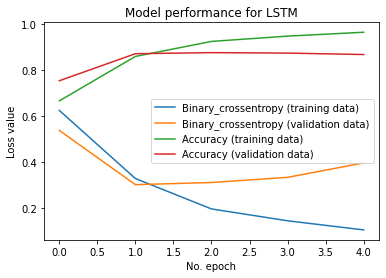

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Binary_crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary_crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for LSTM')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="center right")
plt.show()